## 案例1: 给定一个二维数据集，使用kmeans进行聚类
## 数据集：data/ex7data2.mat

In [1]:
# K-means clustering 也就是 K-means聚类算法
# PCA 主成分分析算法

# 这两个算法都属于 无监督学习，不需要 标签 y


import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data1 = sio.loadmat('./data/ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = data1['X']
X.shape

(300, 2)

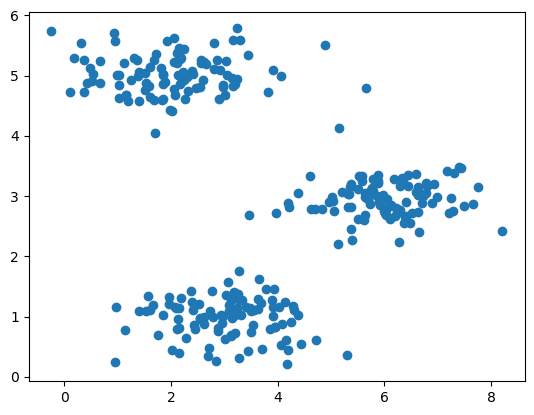

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.show()

## 1. 获取每个样本所属的类别

In [21]:
def find_centroids(X,centros):
    
    idx = []
    
    for i in range(0,len(X)):
        # (2,) (k,2) -> (k,2)
        dist = np.linalg.norm((X[i] - centros),axis=1) #(k,)
        id_i = np.argmin(dist)
        idx.append(id_i)
        
    return np.array(idx)

In [22]:
centros = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_centroids(X,centros)
idx[:3]

array([0, 2, 1], dtype=int64)

## 2. 计算聚类中心点

In [23]:
a = np.array([1, 2, 3, 4, 5, 6,])
a

array([1, 2, 3, 4, 5, 6])

In [25]:
b = a.reshape(2,3)
b

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
centros_i = np.mean(b,axis=0)
centros_i

array([2.5, 3.5, 4.5])

In [7]:
def compute_centros(X,idx,k):
    
    centros = []
    
    for i in range(0,k):
        centros_i = np.mean(X[idx == i],axis=0)
        centros.append(centros_i)
        
    return np.array(centros)

In [8]:
compute_centros(X,idx,k=3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

## 3.运行kmeans，重复执行1和2

In [9]:
def run_kmeans(X,centros,iters):
    
    
    k = len(centros)
    centros_all = []
    centros_all.append(centros)
    centros_i = centros
    for i in range(iters):
        idx = find_centroids(X,centros_i)
        centros_i = compute_centros(X,idx,k)
        centros_all.append(centros_i)
        
    return idx,np.array(centros_all)

## 绘制数据集和聚类中心的移动轨迹

In [10]:
def plot_data(X,centros_all,idx):
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
    plt.plot(centros_all[:,:,0],centros_all[:,:,1],'kx--')


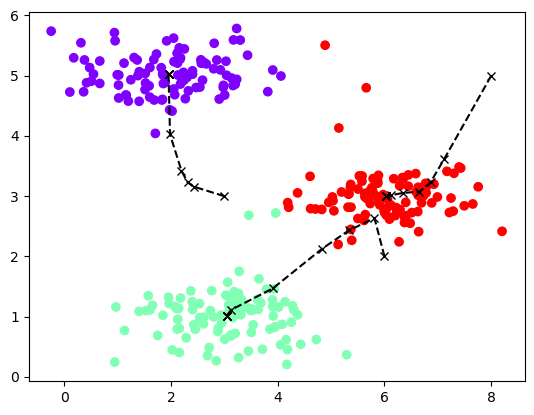

In [11]:
idx,centros_all = run_kmeans(X,centros,iters=10)
plot_data(X,centros_all,idx)

## 观察初始聚类点的位置对聚类效果的影响

In [12]:
def init_centros(X,k):
    index = np.random.choice(len(X),k)
    return X[index]

In [13]:
init_centros(X,k=3)

array([[5.50295759, 2.62924634],
       [1.85382737, 5.00752482],
       [3.1189017 , 0.69438336]])

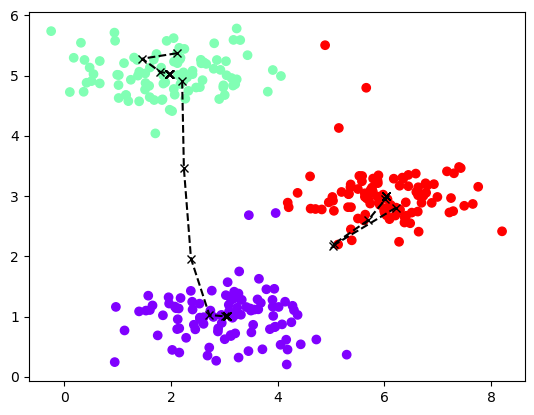

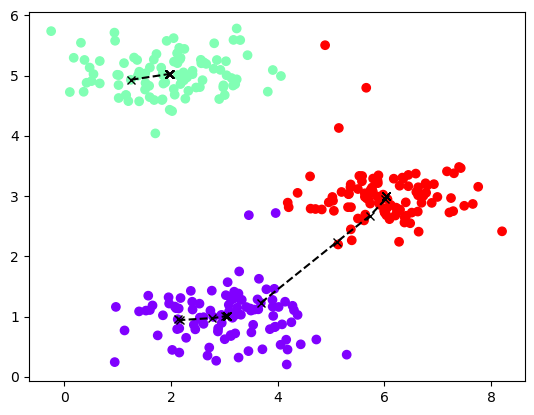

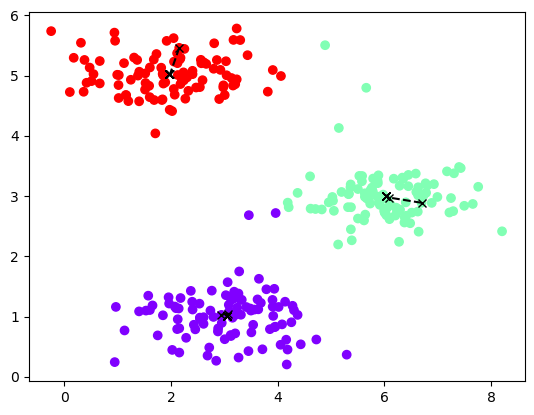

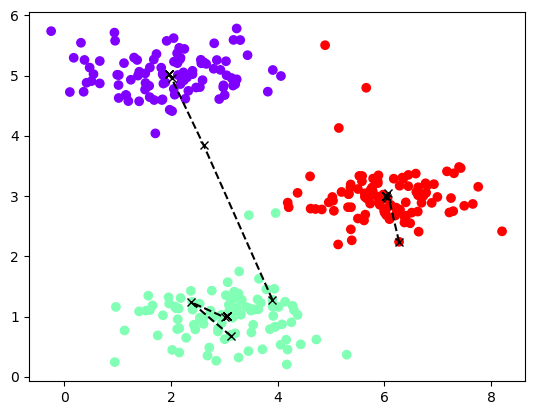

In [14]:
for i in range(4):
    idx,centros_all = run_kmeans(X,init_centros(X,k=3),iters=10)
    plot_data(X,centros_all,idx)

## 案例2: 使用kmeans对图片颜色进行聚类
## RGB图像，每个像素点值范围0-255
## 数据集：data/bird_small.mat，data/bird_small.png

In [33]:
data = sio.loadmat('data/bird_small.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [34]:
A = data['A']
A.shape


(128, 128, 3)

In [35]:
type(A)

numpy.ndarray

In [17]:
from skimage import io

C:\Users\74491\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


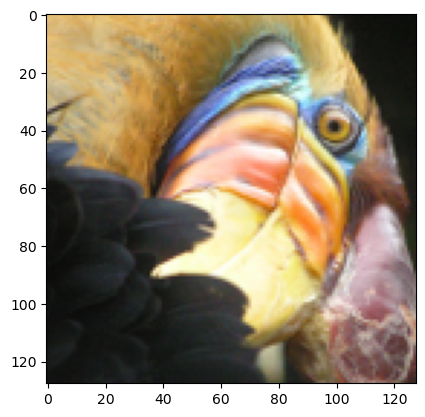

In [18]:
image = io.imread('data/bird_small.png')
plt.imshow(image)

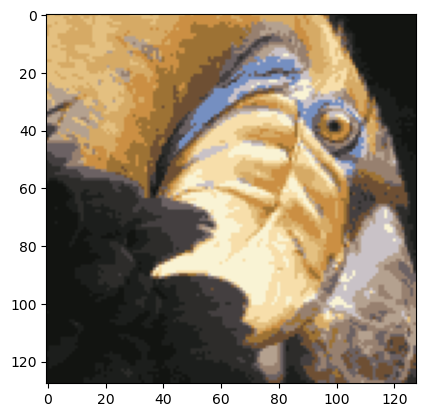

In [20]:
k = 16
idx,centros_all = run_kmeans(A,init_centros(A,k=16),iters=20)
centros = centros_all[-1]
im = np.zeros(A.shape)
for i in range(k):
    im[idx==i] = centros[i]
im = im.reshape(128,128,3)
plt.imshow(im)